In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [3]:
training_df = pd.read_csv('/content/drive/MyDrive/Πτυχιακή/Code/argmining-21-keypoint-analysis-sharedtask-code/data/train_translated.csv')
valid_df = pd.read_csv('/content/drive/MyDrive/Πτυχιακή/Code/argmining-21-keypoint-analysis-sharedtask-code/data/validation_translated.csv')

In [4]:
training_df.key_point.value_counts()

key_point
Οι άνθρωποι θα πρέπει να έχουν το δικαίωμα να κάνουν ό,τι θέλουν με το σώμα τους      132
Το αλκοόλ και ο καπνός είναι πιο επιβλαβή ναρκωτικά, αλλά παραμένουν νόμιμα           131
Η κάνναβη είναι ασφαλής/υγιής/ανακουφίζει από τον πόνο                                130
Αν η κάνναβη νομιμοποιούνταν θα μπορούσε να ρυθμιστεί                                 128
Η κάνναβη είναι οικονομικά επωφελής                                                   127
                                                                                     ... 
Η κυβέρνηση είναι απαραίτητη για την προστασία των δικαιωμάτων των πολιτών             64
Οι θρησκείες είναι ανήθικες και οι άνθρωποι δεν πρέπει να τις ακολουθούν               61
Η πνευματική ιδιοκτησία περιορίζει την πρόσβαση σε σημαντικές πληροφορίες/προϊόντα     61
Οι άνδρες είναι πιο κατάλληλοι για ρόλους μάχης από τις γυναίκες                       59
Οι ανίατα άρρωστοι θα ωφελούνταν από την υποβοηθούμενη αυτοκτονία                      58


In [5]:
training_df

,Unnamed: 0,arg_id,key_point_id,label,arg,key_point,topic,stance
0,0,arg_0_0,kp_0_0,0,Οι άνθρωποι φτάνουν στο όριο της ποιότητας ζωής τους και θα πρέπει να είναι σε θέση να τερματίσουν τον πόνο τους.Αυτό μπορεί να γίνει με ελάχιστο ή καθόλου πόνο με βοήθεια και το άτομο είναι σε θέση να πει αντίο.,Η υποβοηθούμενη αυτοκτονία δίνει αξιοπρέπεια στο άτομο που θέλει να την διαπράξει,Η υποβοηθούμενη αυτοκτονία θα πρέπει να είναι ποινικό αδίκημα,-1
1,1,arg_0_121,kp_0_4,0,μια θεραπεία μπορεί να ανακαλυφθεί λίγο μετά τον τερματισμό της ζωής κάποιου χωρίς λόγο.,Η υποβοηθούμενη αυτοκτονία επιτρέπει στους ανθρώπους να ζητήσουν από κάποιον να πεθάνει για το δικό τους όφελος,Η υποβοηθούμενη αυτοκτονία θα πρέπει να είναι ποινικό αδίκημα,1
2,2,arg_0_121,kp_0_5,0,μια θεραπεία μπορεί να ανακαλυφθεί λίγο μετά τον τερματισμό της ζωής κάποιου χωρίς λόγο.,Η υποβοηθούμενη αυτοκτονία είναι παρόμοια με το να σκοτώσεις κάποιον,Η υποβοηθούμενη αυτοκτονία θα πρέπει να είναι ποινικό αδίκημα,1
3,3,arg_0_121,kp_0_6,1,μια θεραπεία μπορεί να ανακαλυφθεί λίγο μετά τον τερματισμό της ζωής κάποιου χωρίς λόγο.,Η υποβοηθούμενη αυτοκτονία δεν πρέπει να επιτρέπεται γιατί πολλές φορές οι άνθρωποι μπορούν ακόμα να βελτιωθούν,Η υποβοηθούμενη αυτοκτονία θα πρέπει να είναι ποινικό αδίκημα,1
4,4,arg_0_121,kp_0_7,0,μια θεραπεία μπορεί να ανακαλυφθεί λίγο μετά τον τερματισμό της ζωής κάποιου χωρίς λόγο.,Η υποβοηθούμενη αυτοκτονία παραβιάζει το ρόλο του γιατρού,Η υποβοηθούμενη αυτοκτονία θα πρέπει να είναι ποινικό αδίκημα,1
...,...,...,...,...,...,...,...,...
20630,20630,arg_27_221,kp_27_6,0,με το αυξανόμενο κόστος των διδάκτρων του κολεγίου η επαγγελματική εκπαίδευση γίνεται μια πιο ελκυστική επιλογή και θα πρέπει να επιδοτείται,Η επαγγελματική εκπαίδευση ταιριάζει καλύτερα σε πολλούς μαθητές,Πρέπει να επιδοτήσουμε την επαγγελματική εκπαίδευση,1
20631,20631,arg_27_221,kp_27_7,0,με το αυξανόμενο κόστος των διδάκτρων του κολεγίου η επαγγελματική εκπαίδευση γίνεται μια πιο ελκυστική επιλογή και θα πρέπει να επιδοτείται,Η επαγγελματική εκπαίδευση είναι επωφελής για ολόκληρη την αγορά/κοινωνία,Πρέπει να επιδοτήσουμε την επαγγελματική εκπαίδευση,1
20632,20632,arg_27_222,kp_27_4,0,"Ναι, θα πρέπει να επιδοτήσουμε την επαγγελματική εκπαίδευση, επειδή είναι εισαγωγή για τους νέους ανθρώπους",η επιδότηση της επαγγελματικής εκπαίδευσης προωθεί όσους έχουν λιγότερους πόρους,Πρέπει να επιδοτήσουμε την επαγγελματική εκπαίδευση,1
20633,20633,arg_27_222,kp_27_5,1,"Ναι, θα πρέπει να επιδοτήσουμε την επαγγελματική εκπαίδευση, επειδή είναι εισαγωγή για τους νέους ανθρώπους",Η επαγγελματική εκπαίδευση είναι μια καλή επιλογή σταδιοδρομίας,Πρέπει να επιδοτήσουμε την επαγγελματική εκπαίδευση,1


#To how many KPs does each argument belong to? (the majority: 1 KP per argument)

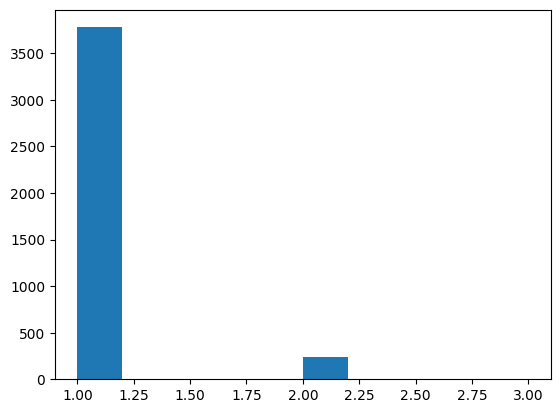

In [6]:
keypoints_per_arg = [x[1] for x in training_df[training_df.label == 1].arg_id.value_counts().to_dict().items()]
plt.hist(keypoints_per_arg)
plt.show()

# How many aguments are attached to each KP on average? : (5-20 args oer KP)

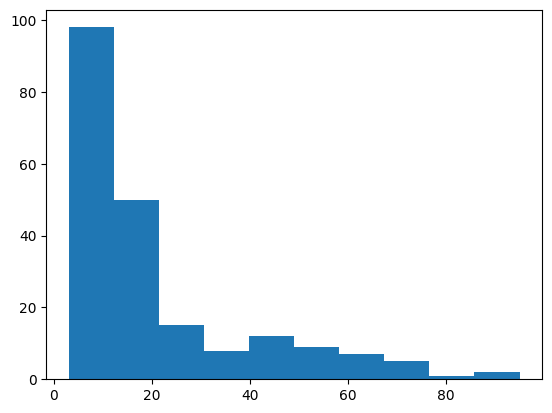

In [7]:
args_per_keypoints = [x[1] for x in training_df[training_df.label == 1].key_point_id.value_counts().to_dict().items()]
plt.hist(args_per_keypoints)
plt.show()

-------------

### Creating data for ContrastiveLoss:

In [ ]:
training_df.head(2000)

,Unnamed: 0,arg_id,key_point_id,label,argument,key_point,topic,stance
0,0,arg_0_0,kp_0_0,0,Οι άνθρωποι φτάνουν στο όριο της ποιότητας ζωής τους και θα πρέπει να είναι σε θέση να τερματίσουν τον πόνο τους.Αυτό μπορεί να γίνει με ελάχιστο ή καθόλου πόνο με βοήθεια και το άτομο είναι σε θέση να πει αντίο.,Η υποβοηθούμενη αυτοκτονία δίνει αξιοπρέπεια στο άτομο που θέλει να την διαπράξει,Η υποβοηθούμενη αυτοκτονία θα πρέπει να είναι ποινικό αδίκημα,-1
1,1,arg_0_121,kp_0_4,0,μια θεραπεία μπορεί να ανακαλυφθεί λίγο μετά τον τερματισμό της ζωής κάποιου χωρίς λόγο.,Η υποβοηθούμενη αυτοκτονία επιτρέπει στους ανθρώπους να ζητήσουν από κάποιον να πεθάνει για το δικό τους όφελος,Η υποβοηθούμενη αυτοκτονία θα πρέπει να είναι ποινικό αδίκημα,1
2,2,arg_0_121,kp_0_5,0,μια θεραπεία μπορεί να ανακαλυφθεί λίγο μετά τον τερματισμό της ζωής κάποιου χωρίς λόγο.,Η υποβοηθούμενη αυτοκτονία είναι παρόμοια με το να σκοτώσεις κάποιον,Η υποβοηθούμενη αυτοκτονία θα πρέπει να είναι ποινικό αδίκημα,1
3,3,arg_0_121,kp_0_6,1,μια θεραπεία μπορεί να ανακαλυφθεί λίγο μετά τον τερματισμό της ζωής κάποιου χωρίς λόγο.,Η υποβοηθούμενη αυτοκτονία δεν πρέπει να επιτρέπεται γιατί πολλές φορές οι άνθρωποι μπορούν ακόμα να βελτιωθούν,Η υποβοηθούμενη αυτοκτονία θα πρέπει να είναι ποινικό αδίκημα,1
4,4,arg_0_121,kp_0_7,0,μια θεραπεία μπορεί να ανακαλυφθεί λίγο μετά τον τερματισμό της ζωής κάποιου χωρίς λόγο.,Η υποβοηθούμενη αυτοκτονία παραβιάζει το ρόλο του γιατρού,Η υποβοηθούμενη αυτοκτονία θα πρέπει να είναι ποινικό αδίκημα,1
...,...,...,...,...,...,...,...,...
1995,1995,arg_1_116,kp_1_4,0,"Μερικά παιδιά δεν μπορούν να επιτύχουν σε ένα ομαδικό περιβάλλον, όπως ένα αυτιστικό παιδί.",Οι γονείς θα έχουν περισσότερη ικανότητα να δώσουν προσοχή/να εκπαιδεύσουν το παιδί τους,Η κατ’ οίκον εκπαίδευση θα πρέπει να απαγορευτεί,-1
1996,1996,arg_1_117,kp_1_0,1,μερικά παιδιά δεν μπορούν να προσαρμοστούν σε ένα κανονικό σχολείο και η κατ' οίκον εκπαίδευση σημαίνει ότι μπορούν ακόμα να λάβουν εκπαίδευση.,Η κατ’ οίκον εκπαίδευση είναι συχνά η καλύτερη επιλογή για την κάλυψη των αναγκών των εξαιρετικών/θρησκευτικών/αρρώστων/αναπήρων μαθητών.,Η κατ’ οίκον εκπαίδευση θα πρέπει να απαγορευτεί,-1
1997,1997,arg_1_117,kp_1_2,0,μερικά παιδιά δεν μπορούν να προσαρμοστούν σε ένα κανονικό σχολείο και η κατ' οίκον εκπαίδευση σημαίνει ότι μπορούν ακόμα να λάβουν εκπαίδευση.,Τα συμβατικά σχολεία έχουν πολλή βία/εκφοβισμό,Η κατ’ οίκον εκπαίδευση θα πρέπει να απαγορευτεί,-1
1998,1998,arg_1_117,kp_1_3,0,μερικά παιδιά δεν μπορούν να προσαρμοστούν σε ένα κανονικό σχολείο και η κατ' οίκον εκπαίδευση σημαίνει ότι μπορούν ακόμα να λάβουν εκπαίδευση.,Οι γονείς θα πρέπει να έχουν τη δυνατότητα να επιλέγουν την εκπαίδευση των παιδιών τους,Η κατ’ οίκον εκπαίδευση θα πρέπει να απαγορευτεί,-1


In [8]:
# Replace the name of a column in each DataFrame
training_df = training_df.rename(columns={'arg': 'argument'})
valid_df = valid_df.rename(columns={'arg': 'argument'})


In [9]:
df = training_df.copy()
df['keypoint'] = df.apply(lambda x: x['topic'] + ' <SEP> ' + x['key_point'], axis=1)
df['label'] = df.label.apply(lambda x: int(x))
df[['argument', 'keypoint', 'label']].to_csv('/content/drive/MyDrive/Πτυχιακή/Code/argmining-21-keypoint-analysis-sharedtask-code/KPA_2021_shared_task/siamese-data/training_df_translated_contrastive.csv')

df = valid_df.copy()
df['keypoint'] = df.apply(lambda x: x['topic'] + ' <SEP> ' + x['key_point'], axis=1)
df['label'] = df.label.apply(lambda x: int(x))
df[['argument', 'keypoint', 'label']].to_csv('/content/drive/MyDrive/Πτυχιακή/Code/argmining-21-keypoint-analysis-sharedtask-code/KPA_2021_shared_task/siamese-data/valid_df_translated_contrastive.csv')

In [ ]:
df

,Unnamed: 0,arg_id,key_point_id,label,argument,key_point,topic,stance,keypoint
0,0,arg_4_121,kp_4_5,1,"Η πραγματική εκπαίδευση είναι να δίνουμε στους μαθητές τα εργαλεία για να μαθαίνουν, να σκέφτονται και να εκφράζονται. Το να τους υπαγορεύουμε τι να φορούν στέλνει ένα ισχυρό μήνυμα ότι δεν τους εμπιστευόμαστε να σκέφτονται μόνοι τους.",Η σχολική στολή βλάπτει την αυτοέκφραση του μαθητή,Πρέπει να εγκαταλείψουμε τη χρήση της σχολικής στολής,1,Πρέπει να εγκαταλείψουμε τη χρήση της σχολικής στολής <SEP> Η σχολική στολή βλάπτει την αυτοέκφραση του μαθητή
1,1,arg_4_121,kp_4_6,0,"Η πραγματική εκπαίδευση είναι να δίνουμε στους μαθητές τα εργαλεία για να μαθαίνουν, να σκέφτονται και να εκφράζονται. Το να τους υπαγορεύουμε τι να φορούν στέλνει ένα ισχυρό μήνυμα ότι δεν τους εμπιστευόμαστε να σκέφτονται μόνοι τους.",Οι σχολικές στολές είναι ακριβές,Πρέπει να εγκαταλείψουμε τη χρήση της σχολικής στολής,1,Πρέπει να εγκαταλείψουμε τη χρήση της σχολικής στολής <SEP> Οι σχολικές στολές είναι ακριβές
2,2,arg_4_121,kp_4_7,0,"Η πραγματική εκπαίδευση είναι να δίνουμε στους μαθητές τα εργαλεία για να μαθαίνουν, να σκέφτονται και να εκφράζονται. Το να τους υπαγορεύουμε τι να φορούν στέλνει ένα ισχυρό μήνυμα ότι δεν τους εμπιστευόμαστε να σκέφτονται μόνοι τους.",Οι σχολικές στολές είναι συχνά άβολες/σεξιστικές,Πρέπει να εγκαταλείψουμε τη χρήση της σχολικής στολής,1,Πρέπει να εγκαταλείψουμε τη χρήση της σχολικής στολής <SEP> Οι σχολικές στολές είναι συχνά άβολες/σεξιστικές
3,3,arg_4_122,kp_4_8,0,τα παιδιά εκφράζονται μέσα από τα ρούχα που φορούν και θα πρέπει να μπορούν να το κάνουν αυτό στο σχολείο,Η σχολική στολή βλάπτει τη μάθηση/δημιουργικότητα,Πρέπει να εγκαταλείψουμε τη χρήση της σχολικής στολής,1,Πρέπει να εγκαταλείψουμε τη χρήση της σχολικής στολής <SEP> Η σχολική στολή βλάπτει τη μάθηση/δημιουργικότητα
4,4,arg_4_122,kp_4_5,1,τα παιδιά εκφράζονται μέσα από τα ρούχα που φορούν και θα πρέπει να μπορούν να το κάνουν αυτό στο σχολείο,Η σχολική στολή βλάπτει την αυτοέκφραση του μαθητή,Πρέπει να εγκαταλείψουμε τη χρήση της σχολικής στολής,1,Πρέπει να εγκαταλείψουμε τη χρήση της σχολικής στολής <SEP> Η σχολική στολή βλάπτει την αυτοέκφραση του μαθητή
...,...,...,...,...,...,...,...,...,...
3453,3453,arg_15_226,kp_15_3,0,"Ναι, θα πρέπει να δουλεύεις για να φτάσεις στην κορυφή, όχι να σου την δίνουν.",Η θετική δράση μειώνει τα επιτεύγματα των μειονοτήτων,Πρέπει να σταματήσουμε τη θετική δράση,1,Πρέπει να σταματήσουμε τη θετική δράση <SEP> Η θετική δράση μειώνει τα επιτεύγματα των μειονοτήτων
3454,3454,arg_15_226,kp_15_4,0,"Ναι, θα πρέπει να δουλεύεις για να φτάσεις στην κορυφή, όχι να σου την δίνουν.",Η θετική δράση είναι αναποτελεσματική,Πρέπει να σταματήσουμε τη θετική δράση,1,Πρέπει να σταματήσουμε τη θετική δράση <SEP> Η θετική δράση είναι αναποτελεσματική
3455,3455,arg_15_226,kp_15_5,1,"Ναι, θα πρέπει να δουλεύεις για να φτάσεις στην κορυφή, όχι να σου την δίνουν.",Η θετική δράση δεν είναι μόνο,Πρέπει να σταματήσουμε τη θετική δράση,1,Πρέπει να σταματήσουμε τη θετική δράση <SEP> Η θετική δράση δεν είναι μόνο
3456,3456,arg_15_226,kp_15_6,0,"Ναι, θα πρέπει να δουλεύεις για να φτάσεις στην κορυφή, όχι να σου την δίνουν.",Η θετική δράση διαιωνίζει την προκατάληψη,Πρέπει να σταματήσουμε τη θετική δράση,1,Πρέπει να σταματήσουμε τη θετική δράση <SEP> Η θετική δράση διαιωνίζει την προκατάληψη


----------